
# MOVIE RATING PREDICTION WTIH PYTHON






Import necessary libraries:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [8]:
movies_df = pd.read_csv(r"C:\Users\NASIM'S PC\Downloads\Movie dataset.csv", encoding='latin1')


Data Cleaning:

In [9]:
movies_df['Rating'].fillna(movies_df['Rating'].mean(), inplace=True)


Split the data into feature columns and target variable

In [10]:
X = movies_df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = movies_df['Rating']

Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Define preprocessor for encoding categorical variables

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
    ])

Create a pipeline for preprocessing and model building

In [13]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

Fit the model

In [14]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', LinearRegression())])

Make predictions

In [15]:
y_pred = pipeline.predict(X_test)


Evaluate the model

In [16]:
mse = mean_squared_error(y_test, y_pred)


In [17]:
rmse = mean_squared_error(y_test, y_pred, squared=False)


In [18]:
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 3.4704847130558067


In [19]:
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 1.862923700277552


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualize the distribution of movie ratings:

In [22]:
# Visualize the distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['Rating'], bins=20, kde=True, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

#### Visualize the relationship between ratings and number of votes:

In [23]:
# Visualize the relationship between ratings and number of votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Votes', data=movies_df, color='coral')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating vs Votes')
plt.show()


### Visualize the top 10 directors based on average ratings of their movies:


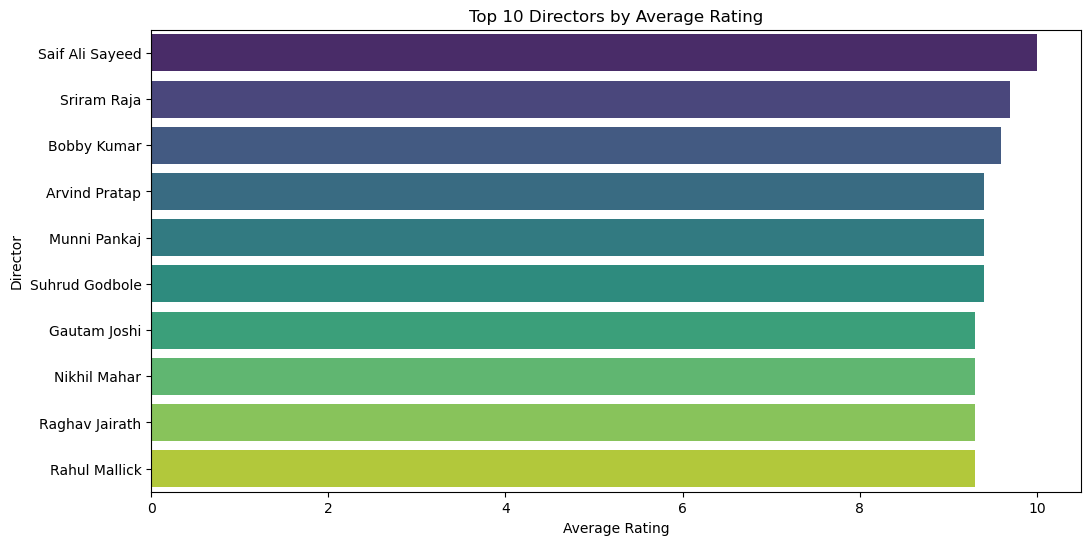

In [24]:
top_directors = movies_df.groupby('Director')['Rating'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.title('Top 10 Directors by Average Rating')
plt.show()

### Data Cleaning and Preprocessing:

Missing values in the 'Rating' column were filled with the average rating to ensure data completeness.
Categorical variables like 'Genre', 'Director', 'Actor 1', 'Actor 2', and 'Actor 3' were encoded using one-hot encoding for modeling.

### Model Building and Evaluation:

A Linear Regression model was built to predict movie ratings based on features like genre, director, and actors.
The model was trained on the data and evaluated using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

### Data Visualizations:

Histogram and density plot showing the distribution of movie ratings.
Scatter plot visualizing the relationship between movie ratings and the number of votes.
Bar plot highlighting the top 10 directors based on the average ratings of their movies.

# Conclusion:

The movie rating prediction model provides a foundation for estimating movie ratings based on key features.
Further analysis and model refinement can lead to more accurate predictions and deeper insights into the factors influencing movie ratings.